In [ ]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import time
import shutil
import os
import requests

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import torchvision.transforms as transforms
from torchvision.transforms.functional import rotate

from torchvision import models
import torchvision.models as models
from torchvision.models import VisionTransformer
import torchvision.utils as vutils
from torchvision.utils import save_image
from torchvision.datasets import MNIST
import torch.nn.utils.spectral_norm as spectral_norm
import timm



from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ExponentialLR
from torchsummary import summary
from functools import partial
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt

random.seed(999)
np.random.seed(999)
torch.manual_seed(999)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
batch_size = 128

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  # 이미지를 PyTorch Tensor로 변환
    transforms.Normalize((0.9054), (0.2309))  # 정규화
])

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  # 이미지를 PyTorch Tensor로 변환
    #transforms.Normalize((0.7024), (0.2209)), #test1
    transforms.Normalize((0.7479), (0.3632)), #test2
    #transforms.Normalize((0.5863, 0.5741, 0.5627), (0.3341, 0.3192, 0.3365))  # 정규화
])

In [ ]:
transform_train2 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  # 이미지를 PyTorch Tensor로 변환
    #transforms.Normalize((0.8859, 0.9369, 0.9370), (0.1787, 0.1798, 0.1794)),  # 정규화
    #transforms.Normalize((0.9217), (0.1738))  # 정규화 2마리용

    #transforms.Normalize((0.8218), (0.2767)) # label 6개용

     transforms.Normalize((0.8573), (0.2434)) # label 2개용
])

In [ ]:
data_dir_1='/content/drive/MyDrive/Project_digimon'
train_set= ImageFolder(root=data_dir_1, transform=transform_train)
train_set2= ImageFolder(root=data_dir_1, transform=transform_train2)

In [ ]:
data_dir_1='/content/drive/MyDrive/Project_digimon_f'
#train_set= ImageFolder(root=data_dir_1, transform=transform_train2)

In [ ]:

data_dir_test='/content/drive/MyDrive/Project_digimon_test_set3'
test_set=ImageFolder(root=data_dir_test,transform=transform_test)
test_loader=torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

In [ ]:
def roll(tensor, shift):
  top, right = shift
  top=-top
  right=-right
  bottom, left= shift
  shifted_image = F.pad(tensor, (left, right, top, bottom),value=0.5777)

  return shifted_image


In [ ]:
train_set_extension=[]
for i, (inputs, label) in enumerate(train_set):
  if(label==0 or label==1):
    train_set_extension.append((inputs, label))
    print(f'done{i}')
  if(i>98):
    break


In [ ]:

train_set2_extension=[]
for i, (inputs, label) in enumerate(train_set2):
  if(label==0 or label==1):
    train_set2_extension.append((inputs, label))
    print(f'done{i}')
  if(i>98):
    break

In [ ]:
train_set_extension2=[]
background_value = 0.5777
for i, (inputs, label) in enumerate(train_set_extension):
    flipped_input=torch.flip(inputs,dims=[2])



    if(1):

      for k in range (-3, 4):

        for j in range (-3, 4):

          i1 = roll(inputs, ((k*3),(j*3)))
          i1[i1==0]=background_value
          i2 = roll(flipped_input, ((k*3),(j*3)))
          i2[i2==0]=background_value
          train_set_extension2.append((i2,label))
          train_set_extension2.append((i1, label))


    print(f'done{i}')



In [ ]:
train_set2_extension2=[]
background_value = 0.5777
for i, (inputs, label) in enumerate(train_set2_extension):
    flipped_input=torch.flip(inputs,dims=[2])



    if(1):

      for k in range (-3, 4):

        for j in range (-3, 4):

          i1 = roll(inputs, ((k*3),(j*3)))
          i1[i1==0]=background_value
          i2 = roll(flipped_input, ((k*3),(j*3)))
          i2[i2==0]=background_value
          train_set2_extension2.append((i2,label))
          train_set2_extension2.append((i1, label))


    print(f'done{i}')

In [ ]:
background_value = 0.5777
for k,(inputs, label) in enumerate(train_set_extension):

    #train_set_extension3.append((inputs,label))

    flipped_input=torch.flip(inputs,dims=[2])

    #train_set_extension3.append((flipped_input,label))

    for i in range (-20, 21):

      if(i !=0):


        input_p=rotate(inputs, i*2)
        input_p[input_p==0]=background_value

        train_set_extension2.append((input_p, label))

        input_p=rotate(flipped_input, i*2)
        input_p[input_p==0]=background_value
        train_set_extension2.append((input_p, label))
    print(f'done{k}')





In [ ]:
train_set2_extension3=[]
background_value = 0.5777
for k,(inputs, label) in enumerate(train_set2_extension2):

    #train_set_extension3.append((inputs,label))

    flipped_input=torch.flip(inputs,dims=[2])

    #train_set_extension3.append((flipped_input,label))

    for i in range (-20, 21):

      if(i !=0):


        input_p=rotate(inputs, i*2)
        input_p[input_p==0]=background_value

        train_set2_extension3.append((input_p, label))

        input_p=rotate(flipped_input, i*2)
        input_p[input_p==0]=background_value
        train_se2t_extension3.append((input_p, label))
    print(f'done{k}')





In [ ]:
trainloader = torch.utils.data.DataLoader(train_set_extension2, batch_size=batch_size, shuffle=True)

In [ ]:
trainloader2 = torch.utils.data.DataLoader(train_set2_extension3, batch_size=batch_size, shuffle=True)

In [ ]:
len(trainloader)*128

17664

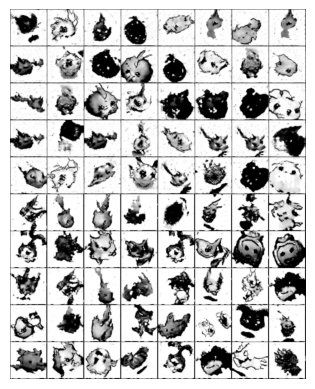

In [ ]:

# 이미지 파일을 열기
data=next(iter(test_loader))
images,_=data
# 이미지 출력
img_grid = vutils.make_grid(images, padding=2, normalize=True)
plt.imshow(np.transpose(img_grid, (1, 2, 0)))
plt.axis('off')  # 축 제거
plt.show()
#print(loaded_labels)

In [ ]:
#loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), num_workers=1)
data=next(iter(test_loader))
images,_=data
mean=images.mean(dim=(0,2,3))
std=images.std(dim=(0,2,3))
print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([-0.0001])
Std: tensor([1.0001])


In [ ]:

class WideBottleNeck(nn.Module):
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, width=2):
        super().__init__()
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels * width, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels * width),
            nn.ReLU(),
            nn.Conv2d(out_channels * width, out_channels * width, stride=stride, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * width),
            nn.ReLU(),
            nn.Conv2d(out_channels * width, out_channels * self.expansion, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels * self.expansion),
        )

        self.relu = nn.ReLU()
        self.shortcut = nn.Sequential()

        if stride != 1 or in_channels != out_channels * self.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * self.expansion, stride=stride, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels * self.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

class WideResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=2, width=2):
        super().__init__()

        self.in_channels = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1, width)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2, width)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2, width)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2, width)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride, width):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride, width))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
def WideResNet18_2():
    return WideResNet(WideBottleNeck, [2, 2, 2, 2], width=2)

In [ ]:
def mixup(x, y, num_classes=6):
  lamda=np.random.beta(1.0,1.0)
  lamda=max(lamda, 1.0-lamda)

  batch_size=x.size(0)
  index = torch.randperm(batch_size)


  m_x=lamda*x+(1-lamda)*x[index]

  m_y=lamda*y+(1-lamda)*y[index]
  m_y=torch.round(m_y).long()



  return m_x, m_y

def cutmix(x, y, num_classes=6):
  lamda=np.random.beta(1.0,1.0)
  lamda = max(lamda, 1.0 - lamda)

  batch_size, channels, height, width = x.size()

  index = torch.randperm(batch_size)


  a = y
  b = y[index]




  b_b_x_1, b_b_y_1, b_b_x_2, b_b_y_2 =rand_bounding_box((batch_size, channels, height, width), lamda)

  m_x=x.clone()
  m_x[:,:,b_b_x_1:b_b_x_2, b_b_y_1:b_b_y_2]=x[index,:,b_b_x_1:b_b_x_2, b_b_y_1:b_b_y_2]
  m_y = lamda * a + (1 - lamda) *b
  m_y=torch.round(m_y).long()


  return m_x, m_y


def rand_bounding_box(size, lamda):
  width=size[3]
  height=size[2]
  cut_r=np.sqrt(1.0-lamda)
  cut_w=int(width*cut_r)
  cut_h=int(height*cut_r)

  cx = torch.randint(0, width, (1,))
  cy = torch.randint(0, height, (1,))

  bb_x_1 = torch.clamp(cx - cut_w // 2, min=0, max=width)
  bb_y_1 = torch.clamp(cy - cut_h // 2, min=0, max=height)
  bb_x_2 = torch.clamp(cx + cut_w // 2, min=0, max=width)
  bb_y_2 = torch.clamp(cy + cut_h // 2, min=0, max=height)


  return bb_x_1, bb_y_1, bb_x_2, bb_y_2

In [ ]:
class Deit_t(nn.Module):
  def __init__(self, num_classes, pretrained=False):
    super(Deit_t, self).__init__()

    self.model=timm.create_model('deit_tiny_patch16_224', pretrained=pretrained, num_classes=num_classes)



  def forward(self, x):
    x = x.expand(-1, 3, -1, -1)

    return self.model(x)

In [ ]:
class EnsembleModel(nn.Module):
    def __init__(self, model1, model2, num_classe=6):
        super(EnsembleModel, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.fc = nn.Linear(num_classes * 2, num_classes)  # 두 모델의 예측을 결합

    def forward(self, x):
        out1 = self.model1(x)
        out2 = self.model2(x)
        combined = torch.cat((out1, out2), dim=1)  # 두 모델의 예측을 결합
        output = self.fc(combined)
        return output

In [ ]:
class Generator_64_3(nn.Module):
  def __init__(self, nz, ngf, nc, num_classes):
    super(Generator_64_3, self).__init__()
    self.embedding=nn.Embedding(num_classes, num_classes)
    self.model = nn.Sequential(


            nn.ConvTranspose2d(nz*1, ngf * 32, 3, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 32),
            nn.ReLU(True),

            ResidualBlock(ngf * 32,ngf * 32),

            nn.ConvTranspose2d(ngf * 32, ngf * 16, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(True),

            ResidualBlock(ngf * 16,ngf * 16),

            nn.ConvTranspose2d(ngf * 16, ngf * 8, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            ResidualBlock(ngf * 8,ngf * 8),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            ResidualBlock(ngf * 4,ngf * 4),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            ResidualBlock(ngf * 2,ngf * 2),


            nn.ConvTranspose2d(ngf * 2, ngf * 1, 3, 1, 1, bias=False),
            nn.BatchNorm2d(ngf * 1),
            nn.ReLU(True),

            ResidualBlock(ngf * 1,ngf * 1),


            nn.ConvTranspose2d(ngf * 1, nc, 2, 1, 0, bias=False),
            nn.Tanh()


        )

  def forward(self, z, labels):
        # 레이블 정보를 임베딩합니다.
        '''label_embed = self.embedding(labels)
        # 임베딩된 레이블 정보를 차원을 조절하여 Generator에 입력합니다.
        label_embed = label_embed.view(label_embed.size(0), -1, 1, 1)
        # 임베딩된 레이블 정보와 입력 z를 연결합니다.
        z = torch.cat((z, label_embed), 1)'''
        return self.model(z)

In [ ]:
class Discriminator_64_3(nn.Module):
    def __init__(self, nc, ndf, num_classes):
        super(Discriminator_64_3, self).__init__()
        self.embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(


            spectral_norm(nn.Conv2d(nc*1, ndf * 1, 3, 2, 0, bias=False)),
            nn.BatchNorm2d(ndf * 1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 1, ndf * 2, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, ndf *16, 3, 1, 0, bias=False),
            nn.BatchNorm2d(ndf * 16),
            nn.LeakyReLU(0.2, inplace=True),

          spectral_norm(nn.Conv2d(ndf * 16, 1, 1, 1, 0, bias=False)),
            nn.Sigmoid(),

        )

    def forward(self, x, labels):
        # 레이블 정보를 임베딩합니다.
        '''label_embed = self.embedding(labels)
        # 임베딩된 레이블 정보를 차원을 조절하여 Discriminator에 입력합니다.
        label_embed = label_embed.view(label_embed.size(0), -1, 1, 1)
        label_embed = label_embed.expand(label_embed.size(0), -1, 64, 64)

        # 임베딩된 레이블 정보와 입력 이미지를 연결합니다.
        #x = torch.cat((x, label_embed), dim=1)'''
        return self.model(x)



In [ ]:
class Discriminator_64_3_2(nn.Module):
    def __init__(self, nc, ndf, num_classes):
        super(Discriminator_64_3_2, self).__init__()
        self.embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(


            spectral_norm(nn.Conv2d(nc*1+num_classes, ndf * 1, 3, 2, 0, bias=False)),
            nn.BatchNorm2d(ndf * 1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 1, ndf * 2, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, ndf *16, 3, 1, 0, bias=False),
            nn.BatchNorm2d(ndf * 16),
            nn.LeakyReLU(0.2, inplace=True),

          spectral_norm(nn.Conv2d(ndf * 16, 1, 1, 1, 0, bias=False)),

        )

    def forward(self, x, labels):
        # 레이블 정보를 임베딩합니다.
        label_embed = self.embedding(labels)
        # 임베딩된 레이블 정보를 차원을 조절하여 Discriminator에 입력합니다.
        label_embed = label_embed.view(label_embed.size(0), -1, 1, 1)
        label_embed = label_embed.expand(label_embed.size(0), -1, 64, 64)

        # 임베딩된 레이블 정보와 입력 이미지를 연결합니다.
        x = torch.cat((x, label_embed), dim=1)
        return self.model(x)


In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        out += residual  # 스킵 연결
        return out

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
#batch_size=200
nz= 100
ngf =64
ndf =64
nc=1
num_classes=1
num_epochs=20
n_critic=7



In [ ]:
img_list = []


netG=Generator_64_3(nz, ngf, nc, num_classes)
netG.apply(weights_init)
netD=Discriminator_64_3(nc, ndf, num_classes)
netD.apply(weights_init)

optimizerG=optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerD=optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
schedulerG=CosineAnnealingLR(optimizerG, T_max=num_epochs)
schedulerD=CosineAnnealingLR(optimizerD, T_max=num_epochs)

netG=netG.to(device)
netD=netD.to(device)

criterion = nn.BCELoss()


In [ ]:
real_label = 1.
fake_label = 0.

In [ ]:

      #loss_real =-output_real.mean()

    #loss_fake = output_fake.mean()

    #loss_g =output_f.mean()

In [ ]:
count=0
for epoch in range(num_epochs):
  for i, (inputs,labels) in enumerate(trainloader2):


    inputs = inputs.to(device)
    labels=labels.to(device)

    z=torch.randn(labels.size(0), nz,1,1).to(device)

    label = torch.full((labels.size(0),), real_label, dtype=torch.float, device=device)


    for k in range(n_critic):
      netD.zero_grad()


      output_real = netD(inputs, labels).view(-1)
      #loss_real =-output_real.mean()
      loss_real =criterion(output_real,label)
      loss_real.backward()




      label.fill_(fake_label)

      fake_i=netG(z, labels)
      output_fake = netD(fake_i.detach(), labels).view(-1)
      #loss_fake = output_fake.mean()
      loss_fake = criterion(output_fake,label)
      loss_fake.backward()

      loss_d =  (loss_real + loss_fake)

      optimizerD.step()

      '''for param in netD.parameters():
                param.data.clamp_(-0.01, 0.01)'''


    label.fill_(real_label)
    netG.zero_grad()
    output_f=netD(fake_i, labels).view(-1)
    #loss_g =-output_f.mean()
    loss_g = criterion(output_f,label)
    loss_g.backward()
    optimizerG.step()








    if i%100==0 or i==len(trainloader)-1:




      print(f'Epoch [{epoch}/{num_epochs-1}] Batch [{i}/{len(trainloader)-1}] Loss D: {loss_d.item():.4f} Loss G: {loss_g.item():.4f}')




  schedulerG.step()
  schedulerD.step()
  with torch.no_grad():
                fake = netG(z, labels).detach().cpu()
                img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
                plt.subplot(1,2,2)
                plt.axis("off")
                plt.imshow(np.transpose(img_list[count],(1,2,0)))
                plt.show()
                count+=1










Output hidden; open in https://colab.research.google.com to view.

In [ ]:
epoch=200
netG.eval()
labels=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#labels=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
labels=torch.tensor(labels).to(device)
y=torch.randn(40, nz,1,1).to(device)

fake = netG(y, labels).detach().cpu()
torch.save(labels, f'labels_epoch_{epoch}.pt')
save_image(fake, f'fake_images_epoch_{epoch}.png', normalize=True)

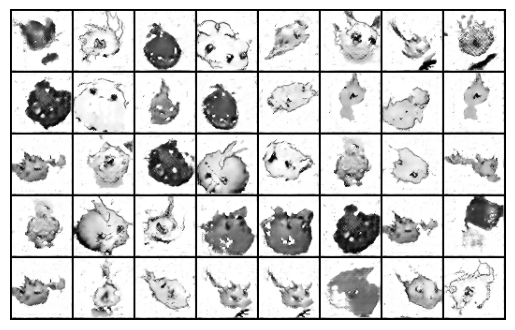

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [ ]:


# 이미지 파일을 열기
image_path = 'fake_images_epoch_100.png'  # 저장된 이미지 파일 경로
image = Image.open(image_path)
loaded_labels = torch.load('labels_epoch_100.pt')

# 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()
print(loaded_labels)

In [ ]:

output_directory = '/content/drive/MyDrive/Project_digimon_test_set3'
os.makedirs(output_directory, exist_ok=True)


In [ ]:
for i,( label) in enumerate(labels):



    # 레이블별 디렉토리를 만들어서 이미지를 저장
    label_directory = os.path.join(output_directory, f'level{label}')
    os.makedirs(label_directory, exist_ok=True)

    # 이미지를 파일로 저장
    image_filename = os.path.join(label_directory, f'fake_image_f{i}.png')
    save_image(fake[i],image_filename)

In [ ]:
# len [45, 54, 159, 261, 254, 317] [0.1, 0.12, 0.35, 0.58, 0.56, 0.7] [0.6, 0.58, 0.35, 0.32, 0.34, 0.3] [0.28345217, 0.21954347, 0.1085242,  0.06611244, 0.06793444, 0.05443327]
class_weights=[0.3, 0.23, 0.11,  0.072, 0.071, 0.07]
class_weights=torch.tensor(class_weights, dtype=torch.float32).to(device)

In [ ]:
num_classes=2
model1=Deit_t(num_classes)
model2=WideResNet18_2()


e_model=EnsembleModel(model1,model2,num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(e_model.parameters(), lr=0.0001)
#optimizer = optim.Adam(model1.parameters(), lr=0.0001)
num_epochs = 50
scheduler=CosineAnnealingLR(optimizer, T_max=num_epochs)
#scheduler = ExponentialLR(optimizer, gamma=0.95)


e_model.train()
model = e_model.to(device)
#model = model1.to(device)

In [ ]:
for inputs, labels in trainloader:


    inputs, labels = inputs.to(device), labels.to(device)
    print(inputs.size(-1))

In [ ]:

for epoch in range(num_epochs):

  for inputs, labels in trainloader:


    inputs, labels = inputs.to(device), labels.to(device)

    #inputs, labels = cutmix(inputs, labels)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
  scheduler.step()
  present_lr=optimizer.param_groups[0]['lr']
  print(f'Epoch [{epoch+1}/{num_epochs}] -, LR: {present_lr} Loss: {loss.item()}')

print('finish')

Epoch [1/50] -, LR: 9.990133642141359e-05 Loss: 0.012543956749141216
Epoch [2/50] -, LR: 9.96057350657239e-05 Loss: 0.008148866705596447
Epoch [3/50] -, LR: 9.911436253643444e-05 Loss: 0.000544905022252351
Epoch [4/50] -, LR: 9.842915805643155e-05 Loss: 0.0012311480240896344
Epoch [5/50] -, LR: 9.755282581475769e-05 Loss: 0.0003132941201329231
Epoch [6/50] -, LR: 9.648882429441257e-05 Loss: 8.962764695752412e-05
Epoch [7/50] -, LR: 9.524135262330098e-05 Loss: 0.0001051218860084191
Epoch [8/50] -, LR: 9.381533400219317e-05 Loss: 3.767538510146551e-05
Epoch [9/50] -, LR: 9.221639627510075e-05 Loss: 5.984566087136045e-05
Epoch [10/50] -, LR: 9.045084971874735e-05 Loss: 2.774510176095646e-05
Epoch [11/50] -, LR: 8.852566213878945e-05 Loss: 0.00015642796643078327
Epoch [12/50] -, LR: 8.644843137107056e-05 Loss: 1.4309809557744302e-05
Epoch [13/50] -, LR: 8.422735529643442e-05 Loss: 7.931252184789628e-05
Epoch [14/50] -, LR: 8.187119948743447e-05 Loss: 2.853543082892429e-05
Epoch [15/50] -, 

In [ ]:
correct = 0
total = 0
predicted_labels = []  # 예측한 레이블을 저장할 리스트
true_labels = []       # 실제 레이블을 저장할 리스트

with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())  # 예측값을 리스트에 추가
            true_labels.extend(labels.cpu().numpy())           # 실제 레이블을 리스트에 추가

print(f'Accuracy of the prototype on the test images: {100 * correct / total:.2f}%')

Accuracy of the prototype on the test images: 70.00%


In [ ]:
print(predicted_labels)
print(true_labels)

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
